# Submission 2 - Intermediate

**Instructions**
- Fill out the 'Basic Information' and 'Simple Hypotheses - Findings / Insights' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Upload the generated HTML for the Moodle submission.
  - If you have a video, then upload that for the Moodle submission, too.

---
## Basic Information

**Team Name:** TODO

**Team Members:**
- TODO
- TODO
- TODO
- TODO

**Dataset Description:**  
(max. 75 words)

TODO

---
## Simple Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

### Visualizations

TODO

### Description

TODO

## Load Data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.colors
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
covid_cases_age_group = pd.read_csv("../data/covid_data/CovidFaelle_Altersgruppe.csv", names=["time","agegroupID","agegroup","state","stateID","num_residents","sex","infected","cured","dead"], delimiter =";",skiprows= 1)
covid_cases_timeline = pd.read_csv("../data/covid_data/CovidFaelle_Timeline_edited_2.csv", names=["Time","state","stateID","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_days","daily_death_count","dead_sum","daily_healed","healed_sum"], delimiter =";",skiprows= 1)
covid_cases_timeline_groupby_disctrict = pd.read_csv("../data/covid_data/CovidFaelle_Timeline_GKZ.csv", names=["time","county","district_id","num_residents","infected","infected_sum","num_infected_last_7_days","incident_last_7_daysle","dead"], delimiter =";",skiprows= 1)
covid_test_data = pd.read_csv("../data/covid_data/CovidFallzahlen.csv", names=["date","num_tests","date_2","FZHosp","FZICU","FZHospFree","FZICUFree","stateID","state"], delimiter =";",skiprows= 1)
hospitalization_data = pd.read_csv("../data/covid_data/Hospitalisierung.csv", names=["date","stateID","state","occupied_normal_care_hospital_beds","available_intensiv_care_hospital_beds","occupied_intensiv_care_hospital_beds","intensive"], delimiter =";",skiprows= 1)
vaccine_data = pd.read_csv("../data/covid_data/COVID19_vaccination_doses_timeline.csv", names=["date","state_id","state_name","vaccine","dose_number","doses_administered_cumulative"], delimiter =";",skiprows= 1)
demographics_data =  pd.read_csv("../data/covid_data/demographic_austria.csv", names=["state","2019","2020","2021","2022"], delimiter =";",skiprows= 1)                                                                                                          
                                                                                                            

### First analysis and clean-up

Hypothesis to investigate "The number of new daily Covid-19 infections in Austria does vary between seasons"

In [3]:
df = covid_cases_timeline.copy()
df_clean = df.drop(columns = ['state', 'stateID', 'num_residents', 'infected_sum', 'num_infected_last_7_days', 'incident_last_7_days', 'daily_death_count', 'dead_sum', 'daily_healed', 'healed_sum'])
df_clean['Time'] = pd.to_datetime(df_clean['Time'],format='%d.%m.%Y')
df_clean

,Time,infected
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
9992,2022-12-27,0
9993,2022-12-28,0
9994,2022-12-29,0
9995,2022-12-30,0


In [4]:
# mask_2020 = (df_clean['Time'] >= '01.01.2020') & (df_clean['Time'] <= '31.12.2020')
# mask_2021 = (df_clean['Time'] >= '01.01.2021') & (df_clean['Time'] < '31.12.2021')
# mask_2022 = (df_clean['Time'] >= '01.01.2022') & (df_clean['Time'] <= '31.12.2022')

# df_aggregated_2020 = df_clean[mask_2020]
# df_aggregated_2021 = df_clean[mask_2021]
# df_aggregated_2022 =df_clean[mask_2022]

In [5]:
# df_aggregated_2020_test = df_aggregated_2020.copy()
# pd.to_datetime(df_aggregated_2020_test['Time'])
# df_aggregated_2020_test = df_aggregated_2020_test.set_index('Time')
# df_aggregated_2020_test = df_aggregated_2020_test.groupby(pd.Grouper(freq='M'))['infected'].sum().reset_index()

# df_aggregated_2021_test = df_aggregated_2021.copy()
# pd.to_datetime(df_aggregated_2021_test['Time'])
# df_aggregated_2021_test = df_aggregated_2021_test.set_index('Time')
# df_aggregated_2021_test = df_aggregated_2021_test.groupby(pd.Grouper(freq='M'))['infected'].sum().reset_index()

# df_aggregated_2022_test = df_aggregated_2022.copy()
# pd.to_datetime(df_aggregated_2022_test['Time'])
# df_aggregated_2022_test = df_aggregated_2022_test.set_index('Time')
# df_aggregated_2022_test = df_aggregated_2022_test.groupby(pd.Grouper(freq='M'))['infected'].sum().reset_index()


In [6]:
# Y = df_aggregated_2020_test['infected']
# X = df_aggregated_2020_test['Time']
 
# plt.figure(figsize=(25,8))
 
# ax = plt.axes()
# ax.grid(linewidth=0.4, color='#8f8f8f')
 
# #ax.set_facecolor("black")
# ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
# ax.set_ylabel('Number of Confirmed Cases\n',
#               size=25,color='#4bb4f2')
 
# ax.plot(X,Y,
#         color='#1F77B4',
#         marker='o',
#         linewidth=4,
#         markersize=15,
#         markeredgecolor='#035E9B')

In [7]:
# Y = df_aggregated_2020_test['infected']
# X = df_aggregated_2020_test['Time']

# Z = df_aggregated_2021_test['infected']
# V = df_aggregated_2022_test['infected']

# plt.figure(figsize=(35,15))
 
# ax = plt.axes()
# ax.grid(linewidth=0.4, color='#8f8f8f')
 
# #ax.set_facecolor("black")
# ax.set_xlabel('\nMonth',size=20,color='k')
# ax.set_ylabel('Number of Confirmed Cases\n',
#               size=20,color='k')
 
# ax.plot(X,Y,
#         color='c',
#         #marker='o',
#         linewidth=4,
#         markersize=15,
#         markeredgecolor='#035E9B')

# ax.plot(X,Z,
#         color='g',
#         #marker='o',
#         linewidth=4,
#         markersize=15,
#         markeredgecolor='#035E9B')

# ax.plot(X,V,
#         color='r',
#         #marker='o',
#         linewidth=4,
#         markersize=15,
#         markeredgecolor='#035E9B')

In [8]:
# Y = df_aggregated_2022_test['infected']
# X = df_aggregated_2022_test['Time']
 
# plt.figure(figsize=(25,8))
 
# ax = plt.axes()
# ax.grid(linewidth=0.4, color='#8f8f8f')


# for i in df_aggregated_2022_test['Time']:
#     ax.axhspan(i,i, facecolor='0.2', alpha=0.5)
#     ax.axvspan(i,i, facecolor='b', alpha=0.5)



# #ax.set_facecolor("black")
# ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
# ax.set_ylabel('Number of Confirmed Cases\n',
#               size=25,color='#4bb4f2')
 
# ax.plot(X,Y,
#         color='#1F77B4',
#         marker='o',
#         linewidth=4,
#         markersize=15,
#         markeredgecolor='#035E9B')

##  Groub by month

In [9]:
# df_sum = df_clean.copy()
# pd.to_datetime(df_sum['Time'])
# df_sum = df_sum.set_index('Time')
# df_sum = df_sum.groupby(pd.Grouper(freq='W-MON'))['infected'].sum().reset_index()

In [10]:
# bounds = [2020,2021,2022]
# colors = ["darkorchid", "crimson", "limegreen"]
# cmap = matplotlib.colors.ListedColormap(colors)
# norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

In [11]:
# Y = df_sum['infected']
# X = df_sum['Time']
 
# plt.figure(figsize=(25,8))
 
# ax = plt.axes()
# ax.grid(linewidth=0.4, color='#8f8f8f')
 
# #ax.set_facecolor("black")
# ax.set_xlabel('\nweek',size=25,color='k')
# ax.set_ylabel('Number of Confirmed Cases\n',
#               size=25,color='k')
# #plt.xticks(X, my_xticks)


# plt.axvline(dt.datetime(2021, 1, 1))
# plt.axvline(dt.datetime(2022, 1, 1))

# ax.plot(X,Y,
#         color='k',
#         #marker='o',
#         linewidth=4,
#         markersize=15,
#         markeredgecolor='k',
#         cmap = cmap,
#         norm=norm)

In [12]:
df_sum = df_clean.copy()
pd.to_datetime(df_sum['Time'])
df_sum = df_sum.set_index('Time')
df_sum = df_sum.groupby(pd.Grouper(freq='W-MON'))['infected'].sum().reset_index()

In [13]:
mask_2020_month = (df_sum['Time'] >= '01.01.2020') & (df_sum['Time'] <= '31.12.2020')
mask_2021_month = (df_sum['Time'] >= '01.01.2021') & (df_sum['Time'] < '31.12.2021')
mask_2022_month = (df_sum['Time'] >= '01.01.2022') & (df_sum['Time'] <= '31.12.2022')



df_aggregated_2020_month_first = df_sum[mask_2020_month]
df_aggregated_2021_month_first = df_sum[mask_2021_month]
df_aggregated_2022_month_first = df_sum[mask_2022_month]

C:\Users\felix\anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31.12.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
C:\Users\felix\anaconda3\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '31.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)
C:\Users\felix\anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '31.12.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


In [14]:
df_aggregated_2020_month = df_aggregated_2020_month_first.copy()
pd.to_datetime(df_aggregated_2020_month['Time'])
df_aggregated_2020_month = df_aggregated_2020_month.set_index('Time')
df_aggregated_2020_month = df_aggregated_2020_month.groupby(pd.Grouper(freq='W-MON'))['infected'].sum().reset_index().sort_values(by='Time')

df_aggregated_2021_month = df_aggregated_2021_month_first.copy()
pd.to_datetime(df_aggregated_2021_month['Time'])
df_aggregated_2021_month = df_aggregated_2021_month.set_index('Time')
df_aggregated_2021_month = df_aggregated_2021_month.groupby(pd.Grouper(freq='W-MON'))['infected'].sum().reset_index().sort_values(by='Time')

df_aggregated_2022_month = df_aggregated_2022_month_first.copy()
pd.to_datetime(df_aggregated_2022_month['Time'])
df_aggregated_2022_month = df_aggregated_2022_month.set_index('Time')
df_aggregated_2022_month = df_aggregated_2022_month.groupby(pd.Grouper(freq='W-MON'))['infected'].sum().reset_index().sort_values(by='Time')

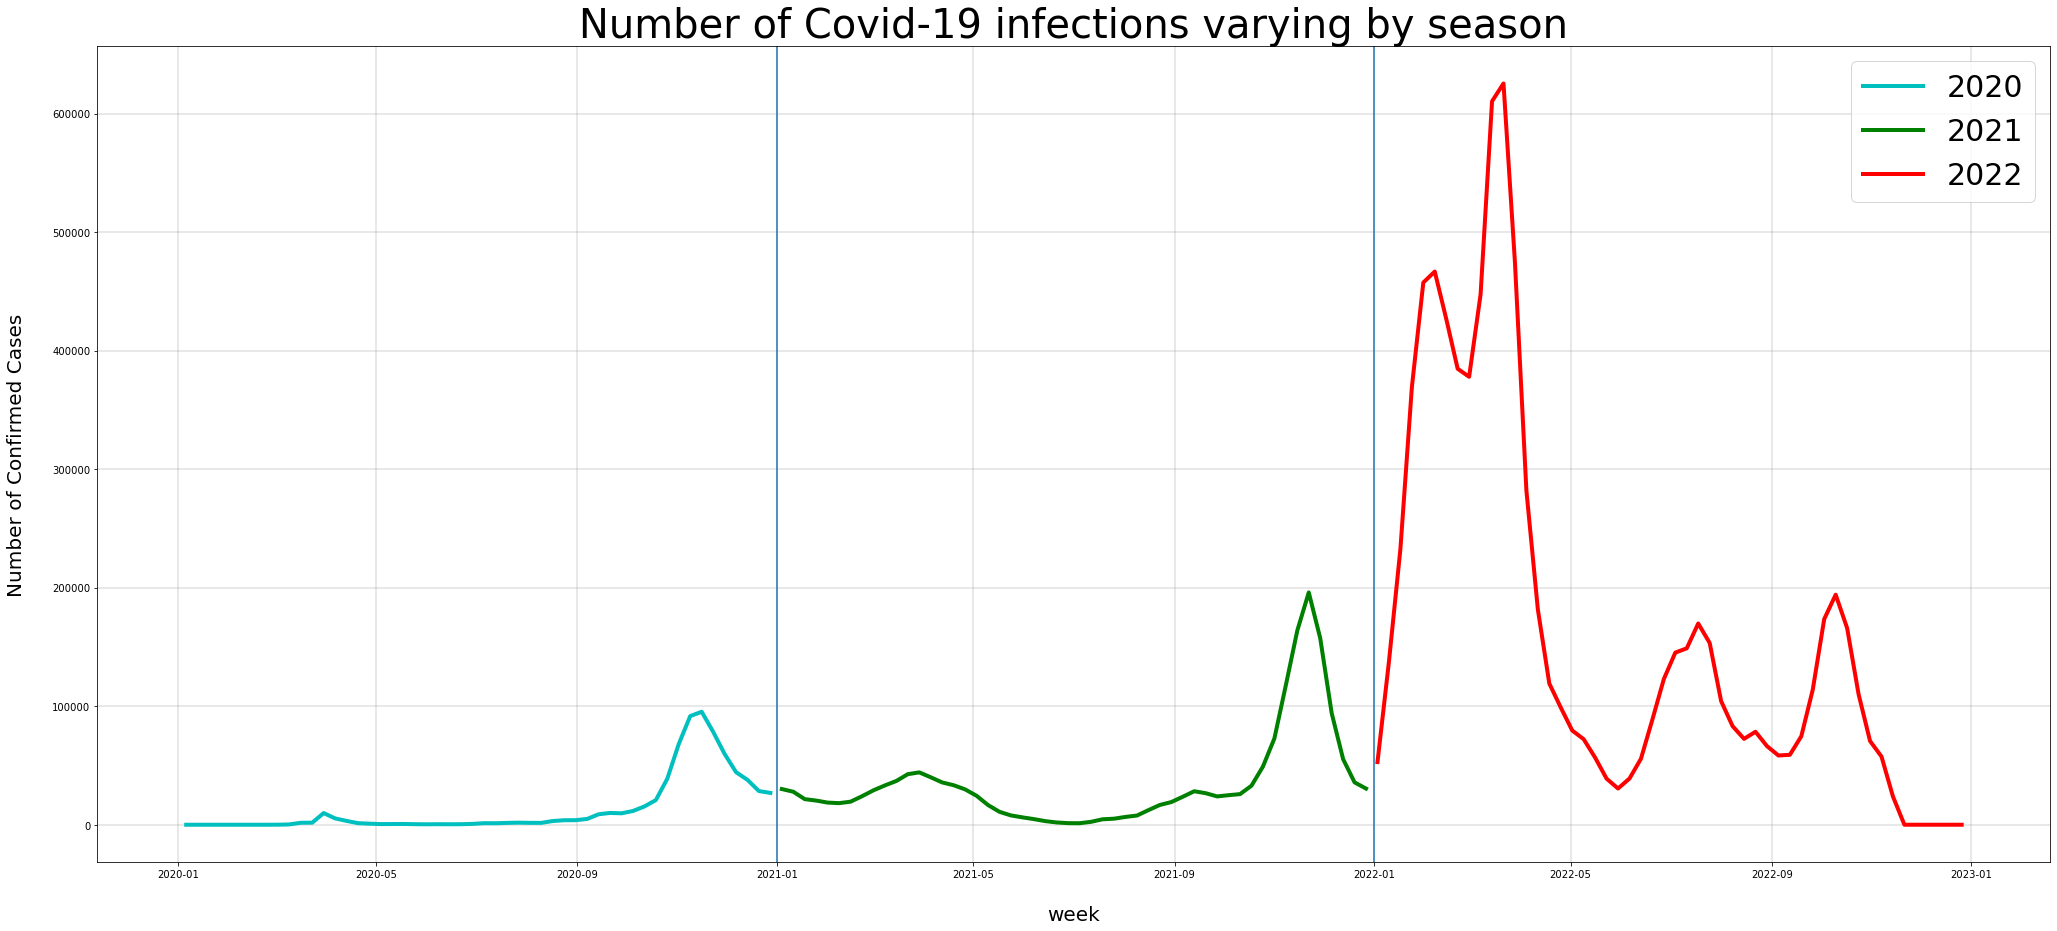

In [15]:
X_1 = df_aggregated_2020_month['Time']
Y = df_aggregated_2020_month['infected']

X_2 = df_aggregated_2021_month['Time']
Z = df_aggregated_2021_month['infected']


X_3 = df_aggregated_2022_month['Time']
V = df_aggregated_2022_month['infected']

plt.figure(figsize=(35,15))
 
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f')
ax.set_title("Number of Covid-19 infections varying by season",fontsize=40)
 
#ax.set_facecolor("black")
ax.set_xlabel('\nweek',size=20,color='k')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=20,color='k')


plt.axvline(dt.datetime(2021, 1, 1))
plt.axvline(dt.datetime(2022, 1, 1))
 
ax.plot(X_1,Y,
        color='c',
        #marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B',
        label='2020')

ax.plot(X_2,Z,
        color='g',
        #marker='o',
        linewidth=4,
        markersize=40,
        markeredgecolor='#035E9B',
        label='2021')

ax.plot(X_3,V,
        color='r',
        #marker='o',
        linewidth=4,
        markersize=40,
        markeredgecolor='#035E9B',
        label='2022')

plt.legend(loc='upper right',prop={'size': 30})